# Graded Challenge 2

## Introduction
Delfi Wardhani

H8 FTDS-002

### Objective
Menerapkan konsep classification dalam membuat prediksi dengan cara mengimplementasikan Logistic Regression dan SVM

### Dataset Description
- Date : Date of the observation
- Location : Location of the weather station
- MinTemp : Minimum temperature in the 24 hours to 9am
- MaxTemp : Maximum temperature in the 24 hours to 9am
- Rainfall : Precipitation (rainfall) in the 24 hours to 9am
- Evaporation : "Class A" pan evaporation in the 24 hours to 9am
- Sunshine : Bright sunshine in the 24 hours to midnight
- WindGustDir : Direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed : Speed of the strongest wind gust in the 24 hours to midnight
- WindDir9am : Direction of the wind at 9am
- WindDir3pm : Direction of the wind at 3pm
- WindSpeed9am : Speed of the wind at 9am
- WindSpeed3pm : Speed of the wind at 3pm
- Humidity9am : Relative humidity at 9am
- Humidity3pm : Relative humidity at 3pm
- Pressure9am : Atmospheric pressure reduced to mean sea level at 9am
- Pressure3pm : Atmospheric pressure reduced to mean sea level at 3pm
- Cloud9am : Fraction of sky obscured by cloud at 9am
- Cloud3pm : Fraction of sky obscured by cloud at 3pm
- Temp9am : Temperature at 9am
- Temp3pm : Temperature at 3am
- RainToday : Did the current day receive precipitation exceeding 1mm in the 24 hours to 9am
- RainTomorrow : Did the next day receive precipitation exceeding 1mm in the 24 hours to 9am


## Import Pustaka

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

## Data Loading

In [2]:
# Membaca file csv
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [28]:
df.shape

(145460, 22)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460

## Data Cleaning

### Pengecekan missing value

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
print('Percent of missing "Evaporation" records is %.2f%%' %((df['Evaporation'].isnull().sum()/df.shape[0])*100))

Percent of missing "Evaporation" records is 43.17%


Mengisi missing value dengan median (untuk data numerik) dan modus (untuk data non-numerik)

In [7]:
df['MinTemp'].fillna(df['MinTemp'].median(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].median(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True) 
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True) 
df['Cloud9am'].fillna(df['Cloud9am'].median(), inplace=True) 
df['Cloud3pm'].fillna(df['Cloud3pm'].median(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].median(), inplace=True) 
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True) 
df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True) 
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].median(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].median(), inplace=True)


df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True) 
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True) 
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True) 
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True) 
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True) 


Pengecekan kembali missing value

In [8]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Pengecekan duplikasi data

In [9]:
# Mengecek adanya duplikasi data
df.duplicated().sum()

0

Mengganti value 'No' dengan 0 dan 'Yes' dengan 1 pada kolom RainToday

In [10]:
df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})
df.RainToday.value_counts(normalize=True)

0    0.780833
1    0.219167
Name: RainToday, dtype: float64

Mengganti value 'No' dengan 0 dan 'Yes' dengan 1 pada kolom RainTomorrow

In [11]:
df.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})
df.RainTomorrow.value_counts(normalize=True)

0    0.780854
1    0.219146
Name: RainTomorrow, dtype: float64

## Eksplorasi Analisis Data

Merubah index pada dataset menjadi Date

In [12]:
df.set_index(['Date'], inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0


### Correlation Matrix
Menampilkan correlation matrix dengan heatmap correlation graph untuk melihat nilai korelasi seluruh data numerik dengan kolom target, yaitu 'RainTomorrow'

<AxesSubplot:title={'center':'Correlation Matrix'}>

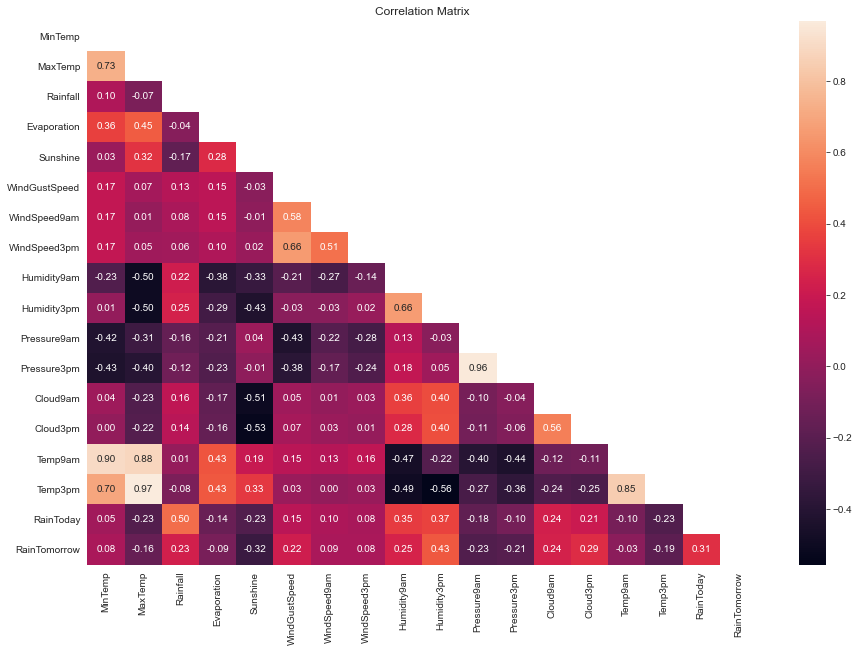

In [30]:
plt.figure(figsize=(15,10))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(), annot=True, fmt='.2f', mask=np.triu(df.corr()))  

Beberapa kolom yang memiliki korelasi sedang dengan 'RainTomorrow':
- Sunshine
- Humidity3pm
- Cloud3pm
- RainToday

Selanjutnya akan dilakukan analisis pada nilai non-numerik, yaitu Location, WindDirGust, WindDir9am, dan WindDir3pm

#### Location

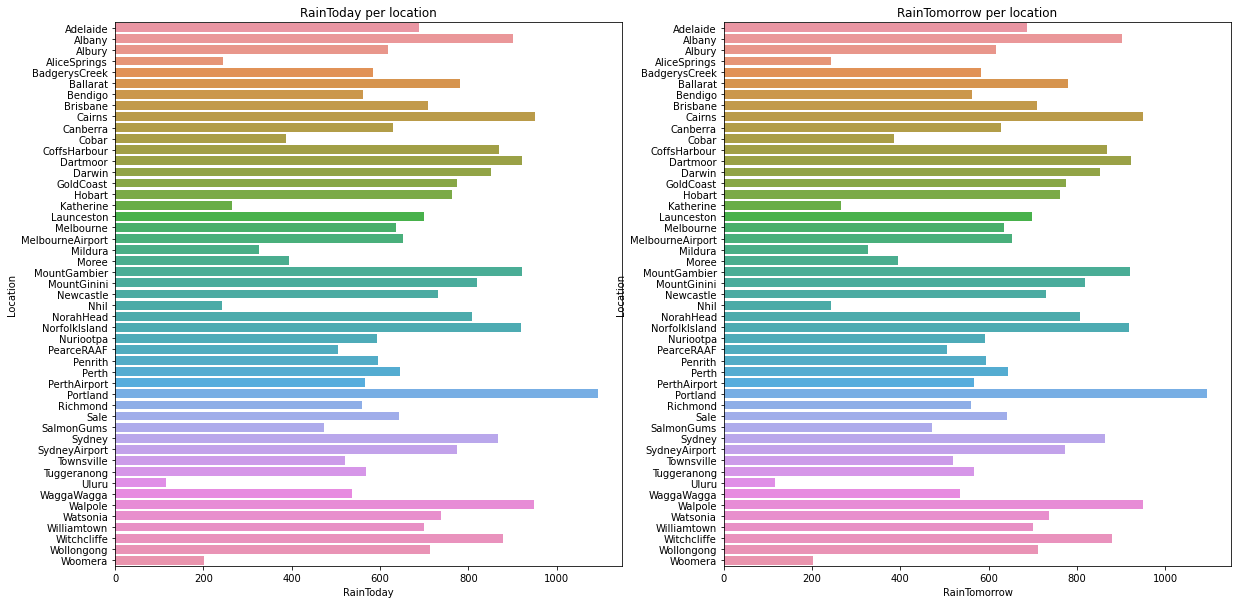

In [15]:
df_loc1 = df.groupby('Location')[['RainTomorrow']].sum().reset_index()
df_loc2 = df.groupby('Location')[['RainToday']].sum().reset_index()
df_loc1['RainToday'] = df_loc2['RainToday']
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('RainToday per location')
sns.barplot(x="RainToday", y="Location", data=df_loc1)

plt.subplot(1,2,2)
plt.title('RainTomorrow per location')
sns.barplot(x="RainTomorrow", y="Location", data=df_loc1)

plt.show()

Terdapat daerah tertentu yang memiliki curah hujan tinggi, seperti Portland dan Cairn

#### WindGustDir

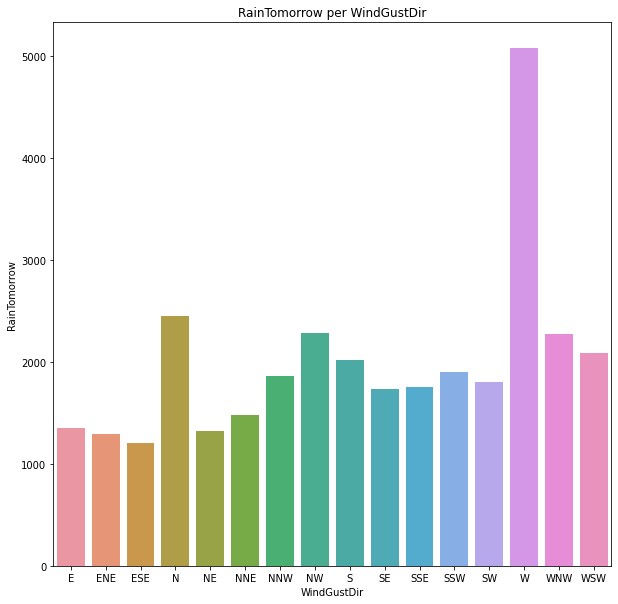

In [16]:
df_wind = df.groupby('WindGustDir')[['RainTomorrow']].sum().reset_index()
plt.figure(figsize=(10,10))

plt.title('RainTomorrow per WindGustDir')
sns.barplot(y="RainTomorrow", x="WindGustDir", data=df_wind)

plt.show()

Angin terkencang yang berhembus seringnya ke arah barat (West)

#### WindDir9am dan WindDir3pm

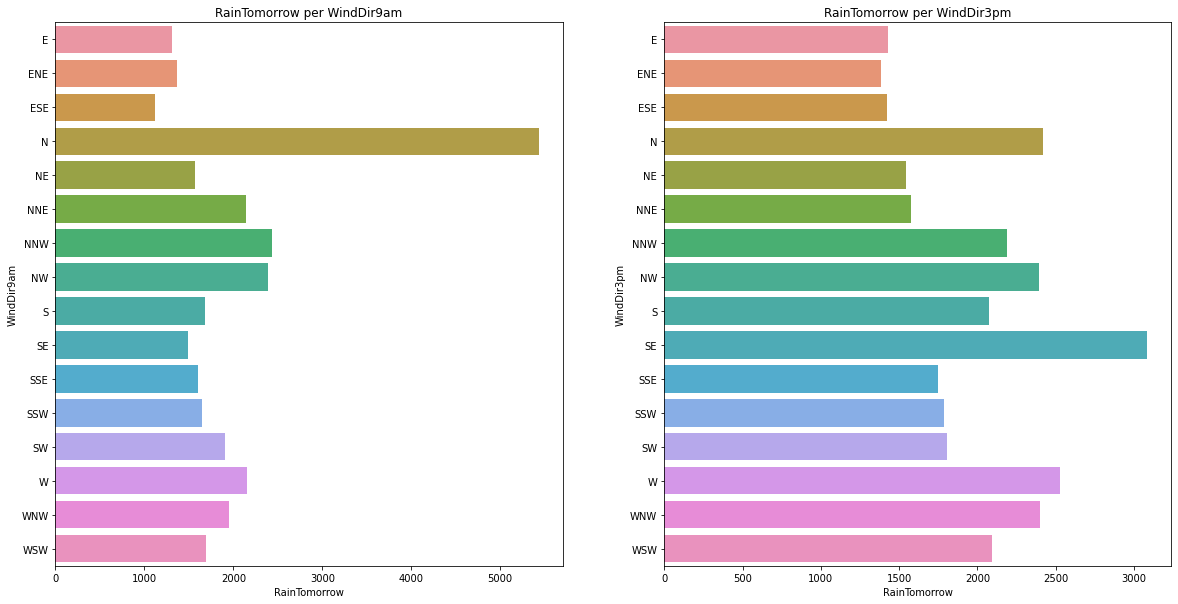

In [17]:
df_wind1 = df.groupby('WindDir9am')[['RainTomorrow']].sum().reset_index()
df_wind2 = df.groupby('WindDir3pm')[['RainTomorrow']].sum().reset_index()

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('RainTomorrow per WindDir9am')
sns.barplot(x="RainTomorrow", y="WindDir9am", data=df_wind1)

plt.subplot(1,2,2)
plt.title('RainTomorrow per WindDir3pm')
sns.barplot(x="RainTomorrow", y="WindDir3pm", data=df_wind2)

plt.show()

Pada pagi hari (9 am), arah angin yang menuju arah Utara lebih sering menghasilkan curah hujan. Sedangkan pada sore hari (3 pm) angin yang menghembus ke arah Tenggara (SE) yang paling sering menghasilkan curah hujan.

## Data Preprocessing

Mempersiapkan data untuk model training dengan feature yang telah dipilih:
- Sunshine
- Humidity3pm
- Cloud3pm
- RainToday

In [19]:
df_imp = df.copy()

hapus = ['Location','MinTemp', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 
        'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm'
        ]
df_imp.drop(hapus, axis=1, inplace=True)
df_imp

,Sunshine,Humidity3pm,Cloud3pm,RainToday,RainTomorrow
Date,,,,,
2008-12-01,8.4,22.0,5.0,0,0
2008-12-02,8.4,25.0,5.0,0,0
2008-12-03,8.4,30.0,2.0,0,0
2008-12-04,8.4,16.0,5.0,0,0
2008-12-05,8.4,33.0,8.0,0,0
...,...,...,...,...,...
2017-06-21,8.4,24.0,5.0,0,0
2017-06-22,8.4,21.0,5.0,0,0
2017-06-23,8.4,24.0,5.0,0,0


### Data Split
Membagi dataset menjadi 2, yaitu 20% data test dan 80% data train

In [22]:
y = df_imp["RainTomorrow"]
X = df_imp.drop('RainTomorrow',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(116368, 4)
(29092, 4)


### Data Scaling

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Definition
Model yang digunakan adalah Logistic Regression dan SVC dari SVM

## Model Training

### Logistic Regression

In [38]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confusion matrix
[[21547  1179]
 [ 3822  2544]]


Accuracy of Logistic Regression: 82.8097071359824 

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22726
           1       0.68      0.40      0.50      6366

    accuracy                           0.83     29092
   macro avg       0.77      0.67      0.70     29092
weighted avg       0.81      0.83      0.81     29092



Dari hasil model training Logistic Regression didapat confusion matrix:
- 21547 data yang terdeteksi True Positive (hujan terdeteksi hujan)
- 2544 data terdeteksi True Negative (tidak hujan terdeteksi tidak hujan)
- 1179 data terdeteksi False Positive (tidak hujan terdeteksi hujan) - type I Error 
- 3822 data terdeteksi False Negative (hujan terdeteksi tidak hujan) - type II Error

nilai akurasi 83%

#### Predicted value

In [39]:
diff = pd.DataFrame({'True Values':y_test,
                     'Prediction' :lr_predict
                    })
diff

,True Values,Prediction
Date,,
2014-12-03,1,0
2015-01-08,1,0
2009-08-16,0,0
2016-08-31,0,0
2011-08-28,0,0
...,...,...
2010-03-08,0,0
2012-06-24,0,0
2011-09-09,1,0


### Support Vector Classifier (SVC)

In [25]:
svc =  SVC(kernel='rbf', C=1)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)

In [26]:
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confusion matrix
[[21897   829]
 [ 4116  2250]]


Accuracy of Support Vector Classifier: 83.00219991750309 

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     22726
           1       0.73      0.35      0.48      6366

    accuracy                           0.83     29092
   macro avg       0.79      0.66      0.69     29092
weighted avg       0.82      0.83      0.81     29092



Dari hasil model training SVC didapat confusion matrix:
- 21897 data yang terdeteksi True Positive (hujan terdeteksi hujan)
- 2250 data terdeteksi True Negative (tidak hujan terdeteksi tidak hujan)
- 829 data terdeteksi False Positive (tidak hujan terdeteksi hujan) - type I Error 
- 4116 data terdeteksi False Negative (hujan terdeteksi tidak hujan) - type II Error

nilai akurasi : 83%

#### Predicted Value

In [37]:
diff = pd.DataFrame({'True Values':y_test,
                     'Prediction' :pred
                    })
diff

,True Values,Prediction
Date,,
2014-12-03,1,0
2015-01-08,1,0
2009-08-16,0,0
2016-08-31,0,0
2011-08-28,0,0
...,...,...
2010-03-08,0,0
2012-06-24,0,0
2011-09-09,1,0


## Model Evaluation

### ROC Curve

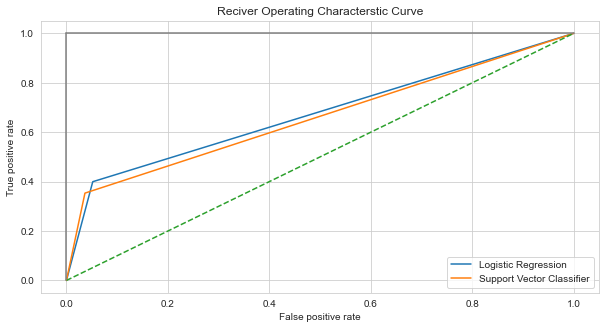

In [27]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

Dilihat dari visualisasi ROC Curve, pemodelan Logistic Regression sedikit lebih baik hasilnya dibandingkan dengan SVC.

## Model Inference

Selanjutnya diberikan sebuah dataset dengan nilai random (0-1) sebanyak 1000 data.

In [43]:
dummy = pd.DataFrame(np.random.randint(0,1,size=(1000, 5)), columns=list('ABCDZ'))
dummy

,A,B,C,D,Z
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
995,0,0,0,0,0
996,0,0,0,0,0
997,0,0,0,0,0
998,0,0,0,0,0


Dataset dummy kemudian di-preprocessing untuk selanjutnya dimasukkan ke dalam model yang telah ditraining sebelumnya

In [44]:
# Assign x and y value from dummy data
y_dum = dummy['Z'].values # Z = target column
X_dum = dummy.drop(columns=['Z'],axis=1).values

# Scaling dummy data
scaler = StandardScaler()
X_dum = scaler.fit_transform(X_dum)

Model training dengan dataset baru / dummy yang menghasilkan output berupa predicted value

In [45]:
pred_dum = lr.predict(X_dum)
diff_dum = pd.DataFrame({'True Values':y_dum,
                     'Prediction' :pred_dum
                    })
diff_dum

,True Values,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


## Kesimpulan
1. Dari hasil model training Logistic Regression didapat confusion matrix:
    - 21547 data yang terdeteksi True Positive (hujan terdeteksi hujan)
    - 2544 data terdeteksi True Negative (tidak hujan terdeteksi tidak hujan)
    - 1179 data terdeteksi False Positive (tidak hujan terdeteksi hujan) - type I Error 
    - 3822 data terdeteksi False Negative (hujan terdeteksi tidak hujan) - type II Error

    nilai akurasi 83%

2. Dari hasil model training SVC (dengan kernel rbf dan nilai C=1) didapat confusion matrix:
    - 21897 data yang terdeteksi True Positive (hujan terdeteksi hujan)
    - 2250 data terdeteksi True Negative (tidak hujan terdeteksi tidak hujan)
    - 829 data terdeteksi False Positive (tidak hujan terdeteksi hujan) - type I Error 
    - 4116 data terdeteksi False Negative (hujan terdeteksi tidak hujan) - type II Error

    nilai akurasi : 83%

3. Hasil dari visualisasi ROC Curve : pemodelan Logistic Regression sedikit lebih baik hasilnya dibandingkan dengan SVC.